In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer

from tools import plot_confusion_matrix

In [2]:
df = pd.read_csv('../data/datatran_2016-2017.csv', dtype={'br_str': str})
df.shape

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(180991, 32)

In [3]:
df.target.value_counts()

1    106534
0     64166
2     10291
Name: target, dtype: int64

In [4]:
dd = df[['weekday', 'uf', 'br_str', 'km_int', 'accident_cause_simplified', 'accident_type', 
        'moment_of_day', 'climate', 'road_type', 'road_layout', 'road_way', 'target']]
dd = dd.dropna()

In [5]:
dd.shape

(180991, 12)

In [6]:
X = pd.get_dummies(dd.drop(['target'], axis=1), drop_first=True)
y = dd['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LogisticRegression()

parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.05, 0.1, 0.5],
    'class_weight': ['balanced', None, {0: 0.3, 1: 0.2, 2: 0.5}]
}


scorer = make_scorer(score_func=accuracy_score)

grid_obj = GridSearchCV(model, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

In [9]:
best_clf

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
joblib.dump(best_clf, '../model/modelo_v0_logistic_regression.pkl') 

['../model/modelo_v0_logistic_regression.pkl']

In [11]:
y_pred = best_clf.predict(X_test)

Confusion matrix, without normalization
[[ 4616  8280     3]
 [ 3052 18157    36]
 [  176  1850    29]]


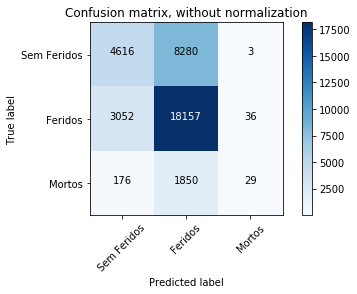

In [12]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['Sem Feridos', 'Feridos', 'Mortos'],
                      title='Confusion matrix, without normalization')

In [13]:
accuracy_score(y_test, y_pred)

0.6299069035056217

In [14]:
precision0 = cnf_matrix[0,0] / (cnf_matrix[0,0] + cnf_matrix[1,0] + cnf_matrix[1,2])
recall0 = cnf_matrix[0,0] / (cnf_matrix[0,0] + cnf_matrix[0,1] + cnf_matrix[0,2])

print('Precision classe de sem vítimas: ', precision0)
print('Recall classe de sem vítimas: ', recall0)
print('F1 classe de sem vítimas: ', 1 * ((precision0 * recall0) / (precision0 + recall0)))
print('----')

precision1 = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[0,1] + cnf_matrix[2,1])
recall1 = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[1,0] + cnf_matrix[1,2])

print('Precision classe de feridos: ', precision1)
print('Recall classe de feridos: ', recall1)
print('F1 classe de feridos: ', 1 * ((precision1 * recall1) / (precision1 + recall1)))
print('----')

precision2 = cnf_matrix[2,2] / (cnf_matrix[2,2] + cnf_matrix[0,2] + cnf_matrix[1,2])
recall2 = cnf_matrix[2,2] / (cnf_matrix[2,2] + cnf_matrix[2,0] + cnf_matrix[2,1])

print('Precision classe de mortos: ', precision2)
print('Recall classe de mortos: ', recall2)
print('F1 classe de mortos: ', 1 * ((precision2 * recall2) / (precision2 + recall2)))

Precision classe de sem vítimas:  0.5991692627206646
Recall classe de sem vítimas:  0.3578571982324211
F1 classe de sem vítimas:  0.22404504198417707
----
Precision classe de feridos:  0.6418849648248312
Recall classe de feridos:  0.8546481525064721
F1 classe de feridos:  0.3665711055479286
----
Precision classe de mortos:  0.4264705882352941
Recall classe de mortos:  0.014111922141119221
F1 classe de mortos:  0.013659915214319359
